In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('images/cat_damaged.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

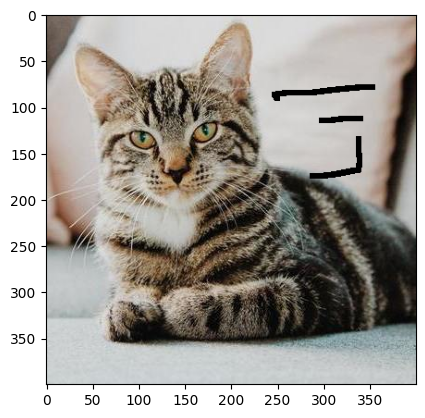

In [4]:
plt.imshow(img_rgb)

In [5]:
height, width, _ = img.shape

In [7]:
height, width

(400, 400)

In [8]:
mask = np.zeros([height, width, 3], dtype = np.uint8)

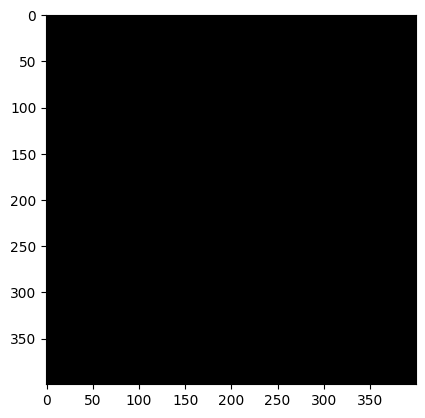

In [9]:
plt.imshow(mask)

In [11]:
img_not = cv2.bitwise_not(mask)
img_new = cv2.bitwise_xor(img_rgb, img_not)

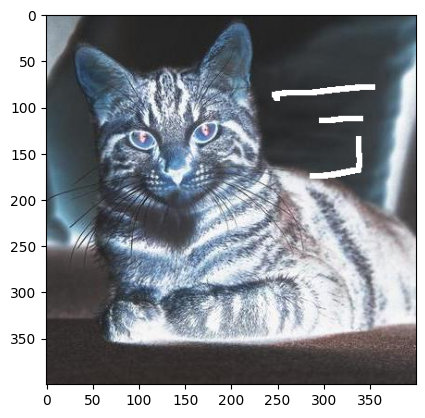

In [13]:
plt.imshow(img_new)

In [14]:
for i in range(width):
    for j in range(height):
        if sum(img[i,j]) == 0:
            mask[i,j] = [255,255,255]

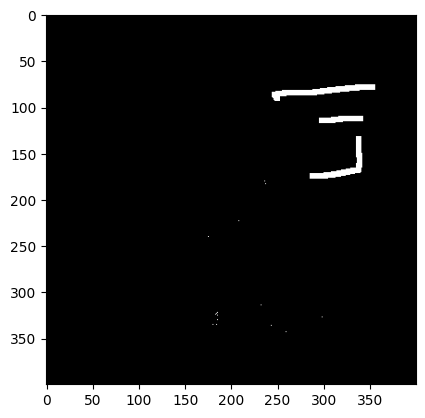

In [15]:
plt.imshow(mask)

In [16]:
mask.shape

(400, 400, 3)

In [17]:
mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

In [18]:
mask.shape

(400, 400)

In [19]:
help(cv2.inpaint)

Help on built-in function inpaint:

inpaint(...)
    inpaint(src, inpaintMask, inpaintRadius, flags[, dst]) -> dst
    .   @brief Restores the selected region in an image using the region neighborhood.
    .   
    .   @param src Input 8-bit, 16-bit unsigned or 32-bit float 1-channel or 8-bit 3-channel image.
    .   @param inpaintMask Inpainting mask, 8-bit 1-channel image. Non-zero pixels indicate the area that
    .   needs to be inpainted.
    .   @param dst Output image with the same size and type as src .
    .   @param inpaintRadius Radius of a circular neighborhood of each point inpainted that is considered
    .   by the algorithm.
    .   @param flags Inpainting method that could be cv::INPAINT_NS or cv::INPAINT_TELEA
    .   
    .   The function reconstructs the selected image area from the pixel near the area boundary. The
    .   function may be used to remove dust and scratches from a scanned photo, or to remove undesirable
    .   objects from still images or video. See

In [20]:
# apply the inpainting
img_new = cv2.inpaint(img_rgb, mask, 3, cv2.INPAINT_NS)

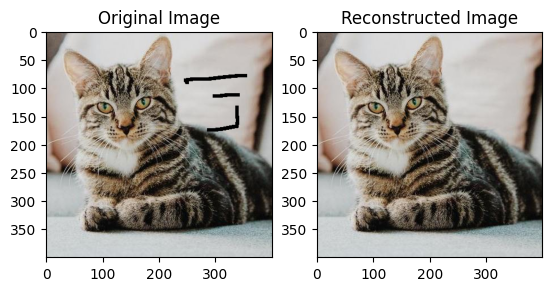

In [21]:
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.title('Reconstructed Image')
plt.imshow(img_new)